<a href="https://colab.research.google.com/github/SJP0308/MLTUTORIAL/blob/House-Prices/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **문제 정의**

**It is your job to predict the sales price for each house.** For each Id in the test set, you must predict the value of the SalePrice variable.

# **평가 방식**

Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# **데이터셋 다운로드**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# 경고 메시지를 무시하도록 설정
warnings.filterwarnings('ignore')

# 플롯을 인라인으로 표시하도록 설정
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')

train_data = pd.read_csv('/content/drive/My Drive/house_prices/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/house_prices/test.csv')

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

Mounted at /content/drive


In [3]:
df = pd.concat([train_df, test_df], ignore_index=True)

# **Data fields**

In [4]:
for col in ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']:
            df[col] = df[col].fillna('None')

# **EDA (Exploratory Data Analysis)**

## **데이터 구조, 통계적 요약**

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## **이상치 확인**

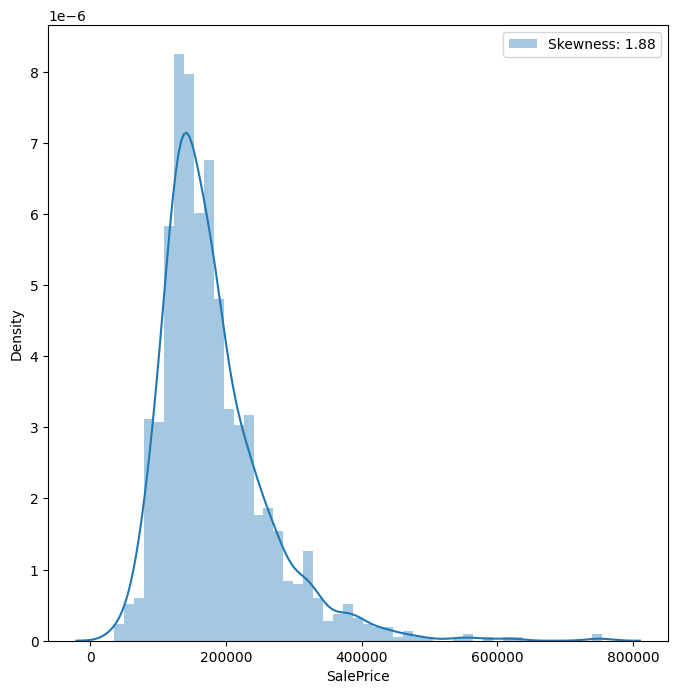

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df['SalePrice'], label='Skewness: {:.2f}'.format(df['SalePrice'].skew()), ax=ax)
g = g.legend(loc='best')

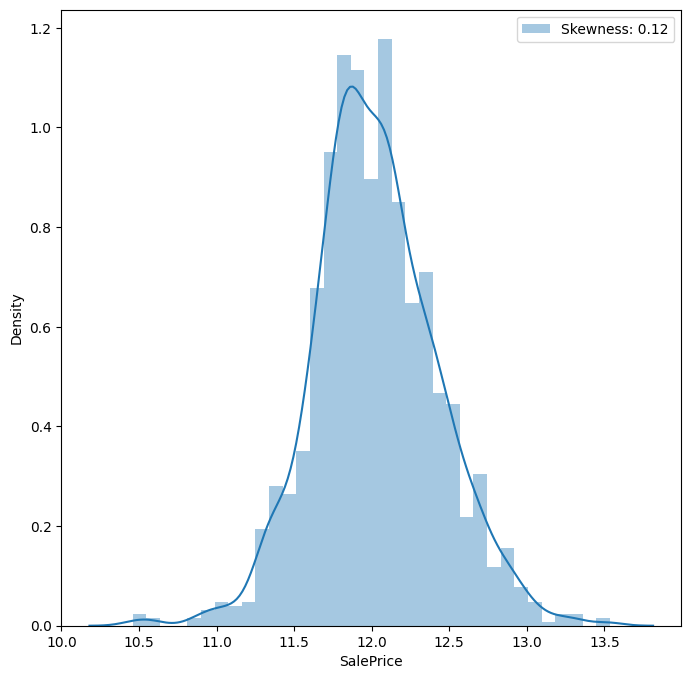

In [9]:
df['SalePrice'] = np.log1p(df["SalePrice"])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df['SalePrice'], label='Skewness: {:.2f}'.format(df['SalePrice'].skew()), ax=ax)
g = g.legend(loc='best')

Text(0.5, 1.0, 'Scatter Plot of Ground Living Area vs Sale Price')

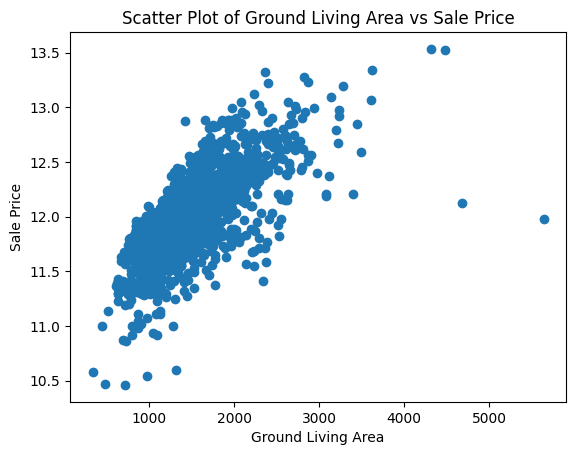

In [10]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Ground Living Area vs Sale Price')

In [11]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<2.60)].index)

## **특성 선택**

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')


<Axes: >

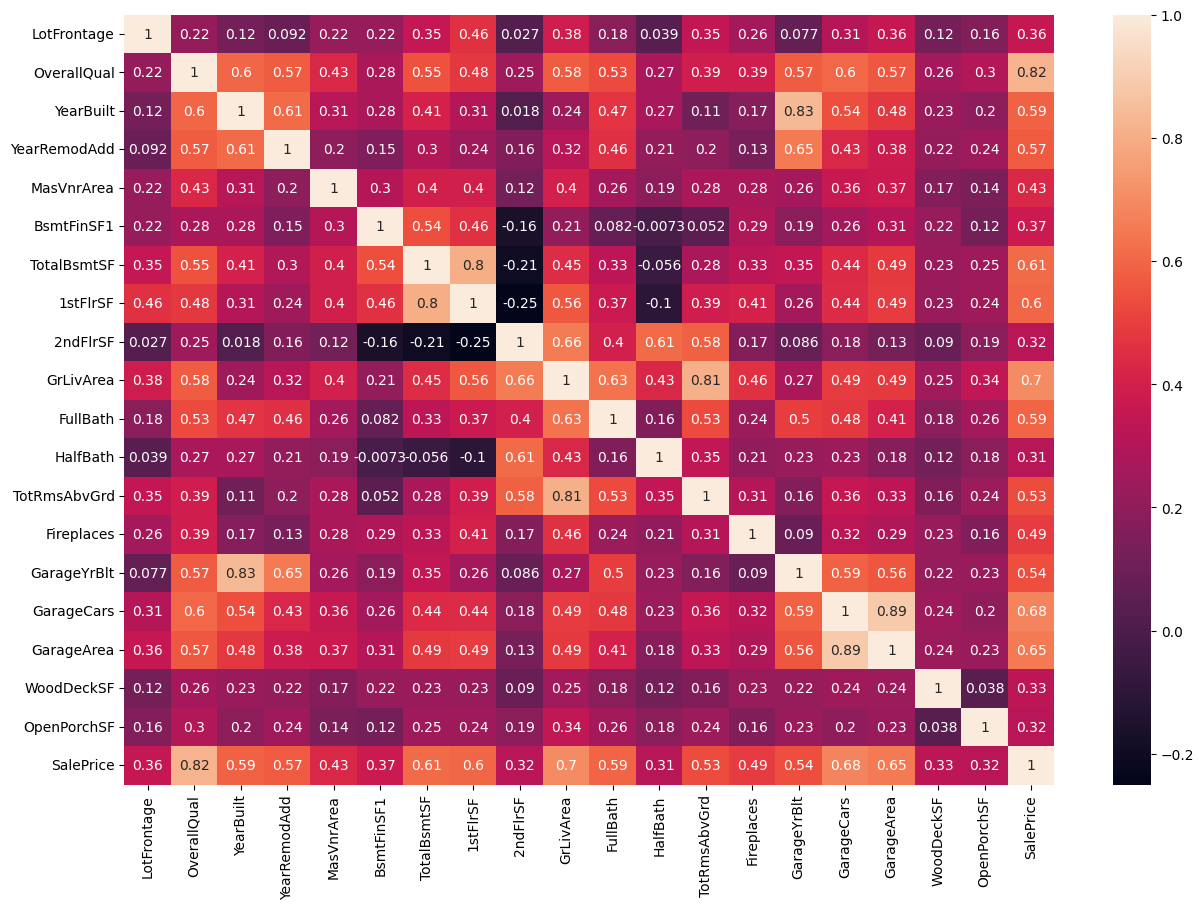

In [12]:
cor = df.select_dtypes(include=['float64', 'int64']).corr()
high_score_cor = cor.index[abs(cor['SalePrice']) >= 0.30]
print(high_score_cor)

plt.figure(figsize=(15, 10))
sns.heatmap(df[high_score_cor].corr(), annot=True)

Index(['ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond',
       'PavedDrive', 'SalePrice'],
      dtype='object')


<Axes: >

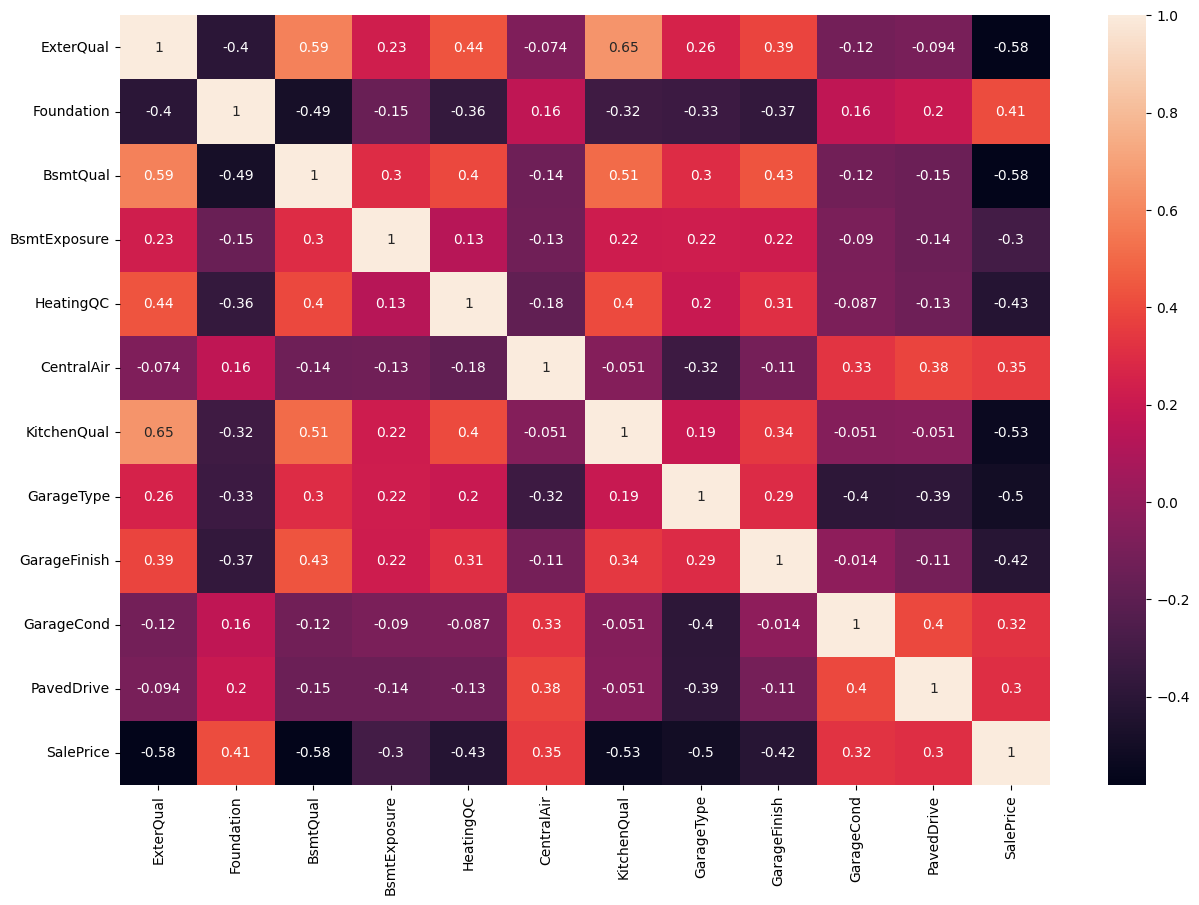

In [13]:
text_col = df.select_dtypes(include=['object']).columns

cop_df = df.copy()
for col in text_col:
    cop_df[col] = cop_df[col].astype('category').cat.codes

cor = cop_df[text_col.tolist() + ['SalePrice']].corr()
text_high_score_cor = cor.index[abs(cor['SalePrice']) >= 0.30]
print(text_high_score_cor)

plt.figure(figsize=(15, 10))
sns.heatmap(cop_df[text_high_score_cor].corr(), annot=True)

In [14]:
df = df[high_score_cor.tolist()[:-1] + text_high_score_cor.tolist()]

## **결측치 확인**

In [15]:
drop = df.columns[df.isnull().mean() > 0.15].tolist()[:-1]
df.drop(drop, axis=1, inplace=True)

In [16]:
col_with_null = []
for col in df.columns[:-1]:
  if df[col].isnull().any():
    col_with_null.append(col)
    per = 'col: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df[col].isnull().mean()))
    print(per)

col: MasVnrArea	 Percent of NaN value: 0.79%
col: BsmtFinSF1	 Percent of NaN value: 0.03%
col: TotalBsmtSF	 Percent of NaN value: 0.03%
col: GarageYrBlt	 Percent of NaN value: 5.45%
col: GarageCars	 Percent of NaN value: 0.03%
col: GarageArea	 Percent of NaN value: 0.03%
col: KitchenQual	 Percent of NaN value: 0.03%


# **특성 공학**

## **결측값 채우기**

In [17]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['KitchenQual'] = df.groupby('OverallQual')['KitchenQual'].transform(lambda x: x.fillna(x.mode()[0]))

## **원-핫 인코딩**

In [18]:
for col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  df[col] = df[col]//10

onehot = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] + df.select_dtypes(include=['object']).columns.tolist()
for col in onehot:
  df = pd.get_dummies(df, columns=[col], prefix=col)

## **로그 스케일**

In [19]:
skew = ['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
           'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

for col in skew:
  if df[col].skew() > 1:
    df[col] = np.log1p(df[col])
  print('{} skew: {:.2f}'.format(col, df[col].skew()))

MasVnrArea skew: 0.54
BsmtFinSF1 skew: -0.62
TotalBsmtSF skew: -4.96
1stFlrSF skew: 0.06
2ndFlrSF skew: 0.86
GrLivArea skew: 0.01
FullBath skew: 0.17
HalfBath skew: 0.69
TotRmsAbvGrd skew: 0.76
Fireplaces skew: 0.73
GarageCars skew: -0.22
GarageArea skew: 0.24
WoodDeckSF skew: 0.16
OpenPorchSF skew: -0.04


# **모델 학습 및 테스트 세트 예측**

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X_train = df[df['SalePrice'].notnull()].drop('SalePrice', axis=1).values
target_label = df[df['SalePrice'].notnull()]['SalePrice'].values
X_test = df[df['SalePrice'].isnull()].drop('SalePrice', axis=1).values

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=42)

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost 모델 초기화
xgb = XGBRegressor()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=kf, verbose=1, n_jobs=1)

# 모델 학습
grid_search.fit(X_train, target_label)
best_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
y_pred = best_model.predict(X_test)

# RMSE 계산 (훈련 데이터에 대한 평가)
train_preds = best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(target_label, train_preds))
print("훈련 데이터 RMSE:", rmse)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적의 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
훈련 데이터 RMSE: 0.09279705806929661


Text(0, 0.5, 'Feature')

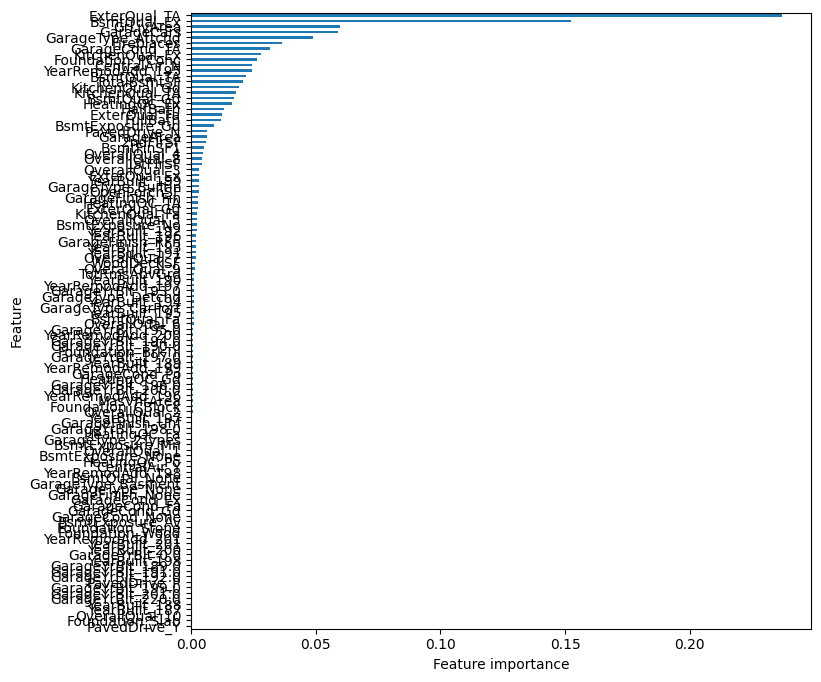

In [21]:
from pandas import Series

test = df[df['SalePrice'].isnull()].drop('SalePrice', axis=1)
feature_importance = best_model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')

In [22]:
submission = pd.read_csv('/content/drive/My Drive/house_prices/sample_submission.csv')
prediction = best_model.predict(test)
submission['SalePrice'] = prediction
submission.to_csv('./answer.csv', index=False)